## Question 3 : Autoencoder

An autoencoder is an unsupervised learning technique for neural networks that learns efficient data representations (encoding) by training the network to ignore signal “noise.” Autoencoders can be used for image denoising, image compression, and, in some cases, even generation of image data.

## Flow of Autoencoder

Noisy Image -> Encoder -> Compressed Representation -> Decoder -> Reconstruct Clear Image

### Deep Learning Approach

## Import Modules

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.datasets import mnist

## Load the Dataset

In [57]:
(x_train, _), (x_test, _) = mnist.load_data()

In [58]:
# normalize the image data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [59]:
# reshape in the input data for the model
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)
x_test.shape

(10000, 28, 28, 1)

## Add Noise to the Image

In [60]:
# add noise
noise_factor = 0.6
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [61]:
# clip the values in the range of 0-1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

## Exploratory Data Analysis

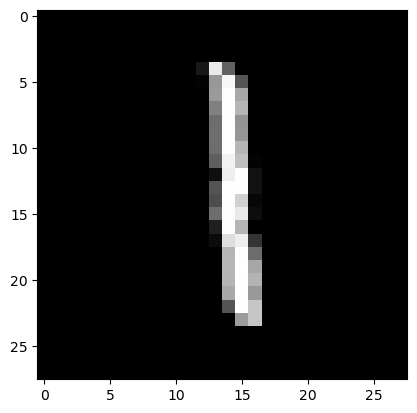

In [62]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test[index].reshape(28,28))
plt.gray()

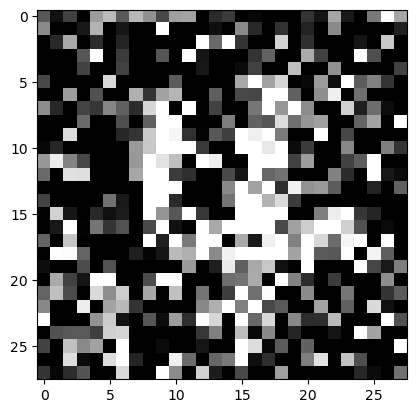

In [63]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()

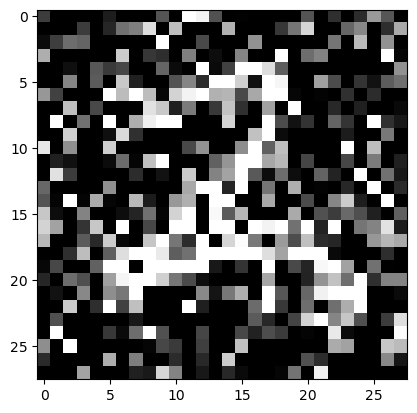

In [64]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()

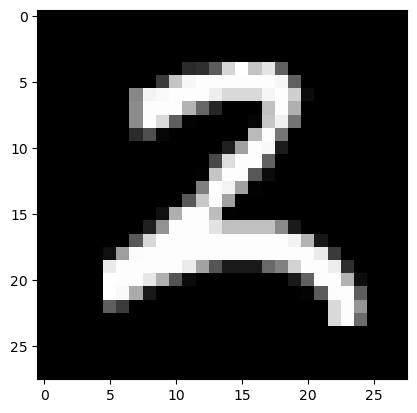

In [65]:
plt.imshow(x_test[index].reshape(28,28))
plt.gray()

## Model Creation

In [66]:
model = Sequential([
                    # encoder network
                    Conv2D(32, 3, activation='relu', padding='same', input_shape=(28, 28, 1)),
                    MaxPooling2D(2, padding='same'),
                    Conv2D(16, 3, activation='relu', padding='same'),
                    MaxPooling2D(2, padding='same'),
                    # decoder network
                    Conv2D(16, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    Conv2D(32, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    # output layer
                    Conv2D(1, 3, activation='sigmoid', padding='same')
])

model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

C:\Users\Keerthana\miniconda3\envs\KeerthanaEnv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 7, 7, 16)            │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_2 (UpSampling2D)       │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 14, 14, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_3 (UpSampling2D)       │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,193 (47.63 KB)

 Trainable params: 12,193 (47.63 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
# train the model
model.fit(x_train_noisy, x_train, epochs=10, batch_size=256, validation_data=(x_test_noisy, x_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 115ms/step - loss: 0.1390 - val_loss: 0.1332
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 40s 110ms/step - loss: 0.1334 - val_loss: 0.1289
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 29s 122ms/step - loss: 0.1297 - val_loss: 0.1265
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 34s 143ms/step - loss: 0.1269 - val_loss: 0.1242
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 31s 130ms/step - loss: 0.1250 - val_loss: 0.1221
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 120ms/step - loss: 0.1228 - val_loss: 0.1206
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 118ms/step - loss: 0.1212 - val_loss: 0.1188
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 29s 124ms/step - loss: 0.1195 - val_loss: 0.1174
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 38s 108ms/step - loss: 0.1184 - val_loss: 0.1166
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 42s 110ms/step - loss: 0.1175 - val_loss: 0.1157


## Visualize the Results

In [71]:
# predict the results from model (get compressed images)
pred = model.predict(x_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


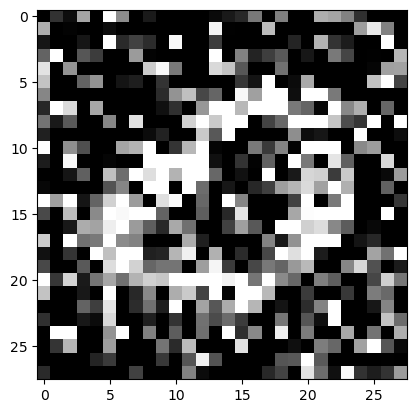

In [72]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()

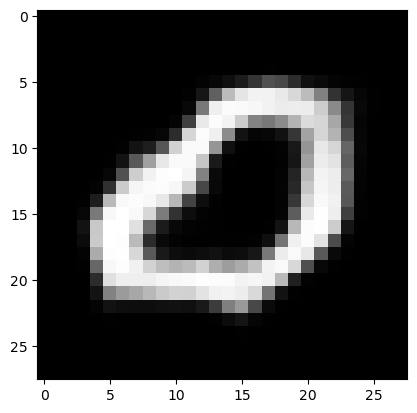

In [73]:
# visualize compressed image
plt.imshow(pred[index].reshape(28,28))
plt.gray()

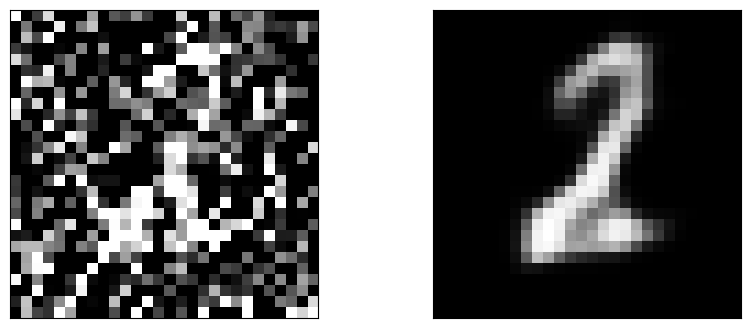

In [74]:
index = np.random.randint(len(x_test))
plt.figure(figsize=(10, 4))
# display original image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# display compressed image
ax = plt.subplot(1, 2, 2)
plt.imshow(pred[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

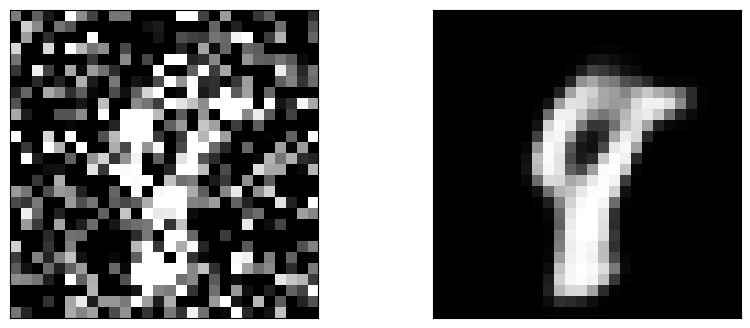

In [75]:
index = np.random.randint(len(x_test))
plt.figure(figsize=(10, 4))
# display original image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# display compressed image
ax = plt.subplot(1, 2, 2)
plt.imshow(pred[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

### Question 1 

In [76]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

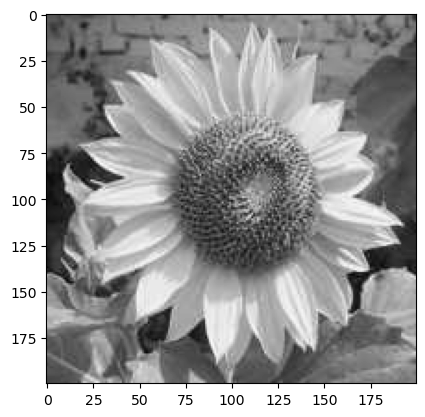

In [77]:
img = cv2.imread('lana.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imgplot = plt.imshow(img, cmap = "gray")
plt.show()

## Wiener Filter

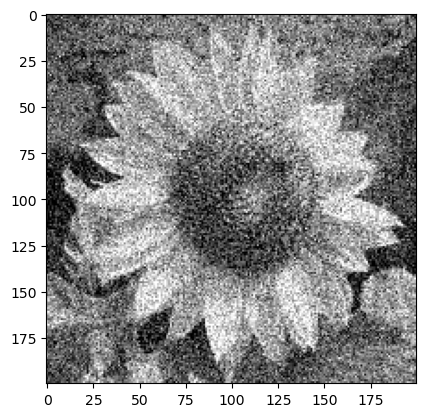

In [88]:
# Adding Gaussian noise
from skimage.util import random_noise

noisy_img = random_noise(img, mode = "gaussian", var = 0.025)
imgplot = plt.imshow(noisy_img, cmap = "gray")
plt.show()

In [79]:
def calculate_psnr(original, noisy):
    original_image_float32 = original.astype(np.float32)
    noisy_image_float32 = noisy.astype(np.float32)
    mse = np.mean((original - noisy) ** 2)
    max_pixel = 255.0
    psnr_value = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr_value

#### Case 1 

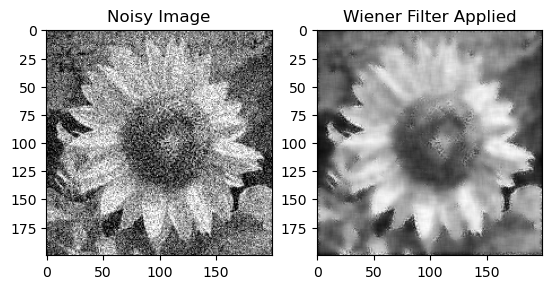

In [80]:
from scipy.signal import wiener

filtered_img = wiener(noisy_img, (7, 7))  
f, (plot1, plot2) = plt.subplots(1, 2)

plot1.imshow(noisy_img, cmap='gray')
plot1.set_title("Noisy Image")

plot2.imshow(filtered_img, cmap='gray')
plot2.set_title("Wiener Filter Applied")

plt.show()

In [81]:
calculate_psnr(noisy_img, filtered_img)

64.61053222250845

### Case 2 

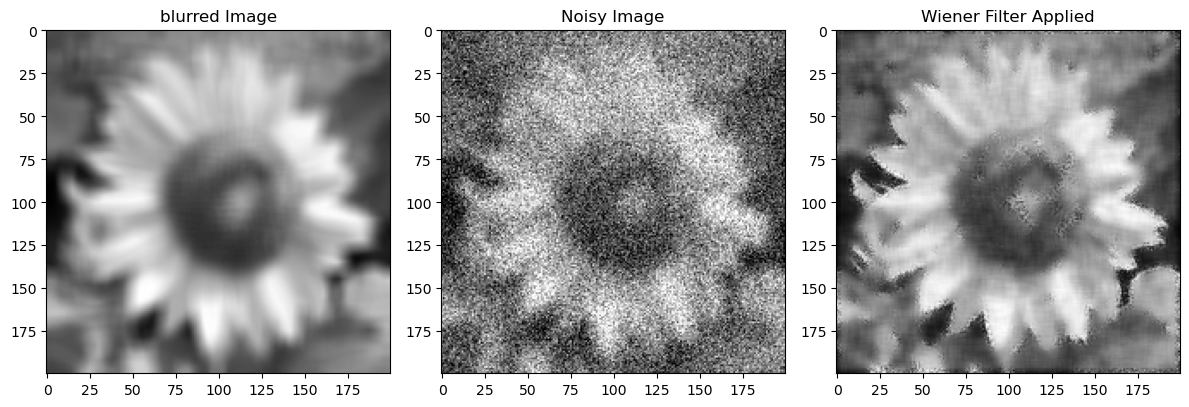

In [82]:
from scipy.signal import wiener
from skimage import data, img_as_float
from skimage.filters import gaussian



ksize = (10, 10)  
blurred_img = cv2.blur(img, ksize)  


noisy_img = random_noise(blurred_img, mode = "gaussian", var = 0.025)

f, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(blurred_img, cmap='gray')
axes[0].set_title("blurred Image")

axes[1].imshow(noisy_img, cmap='gray')
axes[1].set_title("Noisy Image")

axes[2].imshow(filtered_img, cmap='gray')
axes[2].set_title("Wiener Filter Applied")

plt.tight_layout()
plt.show()


In [83]:
calculate_psnr(noisy_img, filtered_img)

63.78506389109245

## MAP filter

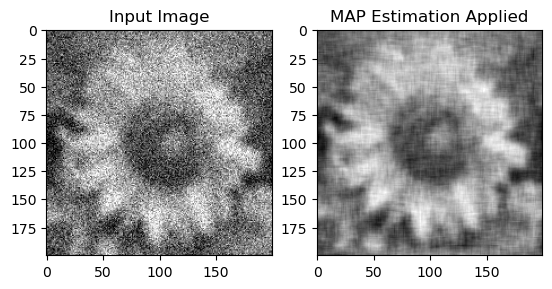

In [84]:
# Adding gaussian noise initially 

def map_estimation_smooth(image, kernel, noisy_image, noise_var, alpha):
    # Convert images to frequency domain
    F = np.fft.fft2(image)
    H = np.fft.fft2(kernel, s=image.shape)
    G = np.fft.fft2(noisy_image)
    
    F_MAP = np.conj(H) / (np.abs(H)**2 + noise_var) * G
    f_MAP = np.fft.ifft2(F_MAP)
    f_MAP = np.abs(f_MAP)
    
    return f_MAP
kernel = np.ones((9, 9), dtype=np.float32) / 9  # Example kernel (assume known)
noise_var = 25  # Example noise variance
alpha = 0.1
initial_guess = np.copy(noisy_img)

clean_image_MAP = map_estimation_smooth(initial_guess, kernel, noisy_img, noise_var, alpha)

f, (plot1, plot2) = plt.subplots(1, 2)

plot1.imshow(noisy_img, cmap='gray')
plot1.set_title("Input Image")

plot2.imshow(clean_image_MAP, cmap='gray')
plot2.set_title("MAP Estimation Applied")

plt.show()


In [85]:
calculate_psnr(noisy_img, clean_image_MAP)

53.94806051994735

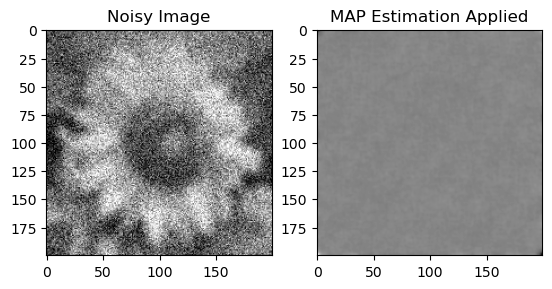

In [86]:
def map_blind_deconvolution(image, noisy_image, lambda_reg=0.2, mu_reg=0.1, iterations=100):
    f = np.copy(image)
    kernel_size = 5  # Adjust according to your problem
    A = np.eye(kernel_size, dtype=np.float32)  # Initialize with an identity matrix
    
    G = np.fft.fft2(noisy_image)
    
    for _ in range(iterations):
        f = np.fft.ifft2(np.fft.fft2(noisy_image) * np.conj(np.fft.fft2(A, s=noisy_image.shape)) / (np.abs(np.fft.fft2(A, s=noisy_image.shape))**2 + lambda_reg)).real
        f = cv2.GaussianBlur(f, (3, 3), 0)  # Apply optional smoothing
        
        # Update convolution kernel estimate
        A = np.fft.ifft2(np.fft.fft2(f, s=noisy_image.shape) * np.conj(np.fft.fft2(noisy_image)) / (np.abs(np.fft.fft2(f, s=noisy_image.shape))**2 + mu_reg)).real
        A = cv2.GaussianBlur(A, (3, 3), 0)  # Apply optional smoothing
        
    return f, A

# Load the noisy imag

# Load the noisy image
# noisy_image = cv2.imread('noisy_image.png', cv2.IMREAD_GRAYSCALE)

# Initial guess for the clean image
initial_guess = np.copy(noisy_img)

# Perform MAP estimation for blind deconvolution problem
clean_image_MAP, kernel_MAP = map_blind_deconvolution(initial_guess,img)
f, (plot1, plot2) = plt.subplots(1, 2)

plot1.imshow(noisy_img, cmap='gray')
plot1.set_title("Noisy Image")

plot2.imshow(clean_image_MAP, cmap='gray')
plot2.set_title("MAP Estimation Applied")

plt.show()


In [87]:
calculate_psnr(noisy_img, clean_image_MAP)

25.30568060621728